# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis

In [3]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The column "diagnosis" is the target variable.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All features are numerical, the target variable is categorical.

In [5]:
dataset.isna().sum()/dataset.shape[0]

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

There are no missing values besides the unnamed column which will be dropped.

In [6]:
dataset = dataset.drop(['Unnamed: 32', 'id'], axis=1)
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Removing highly correlated features

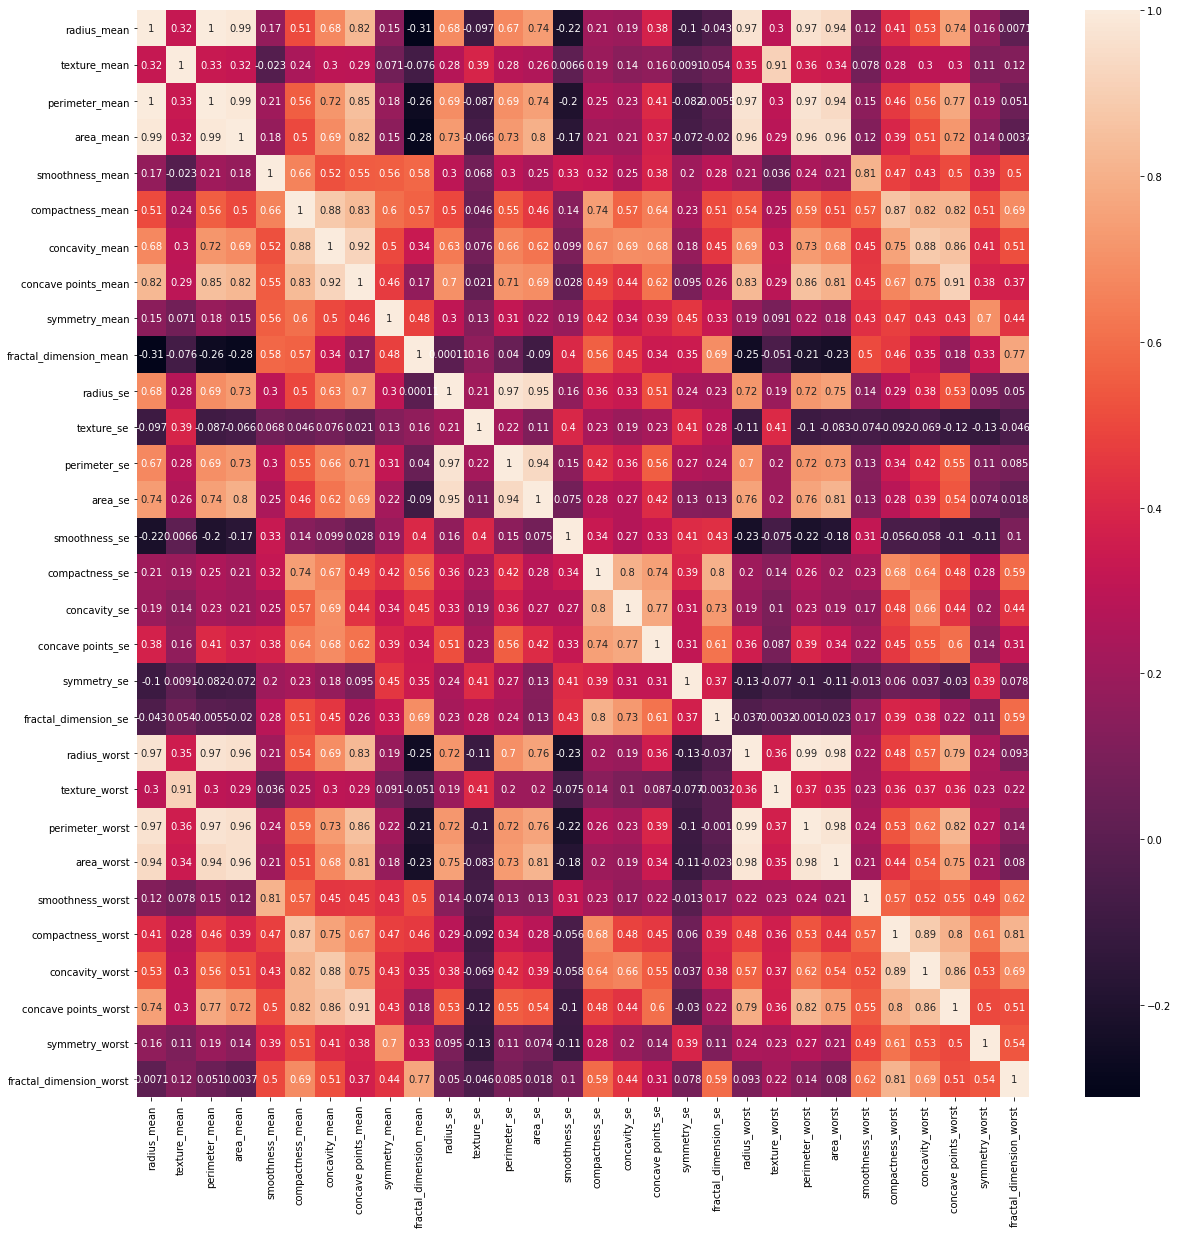

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

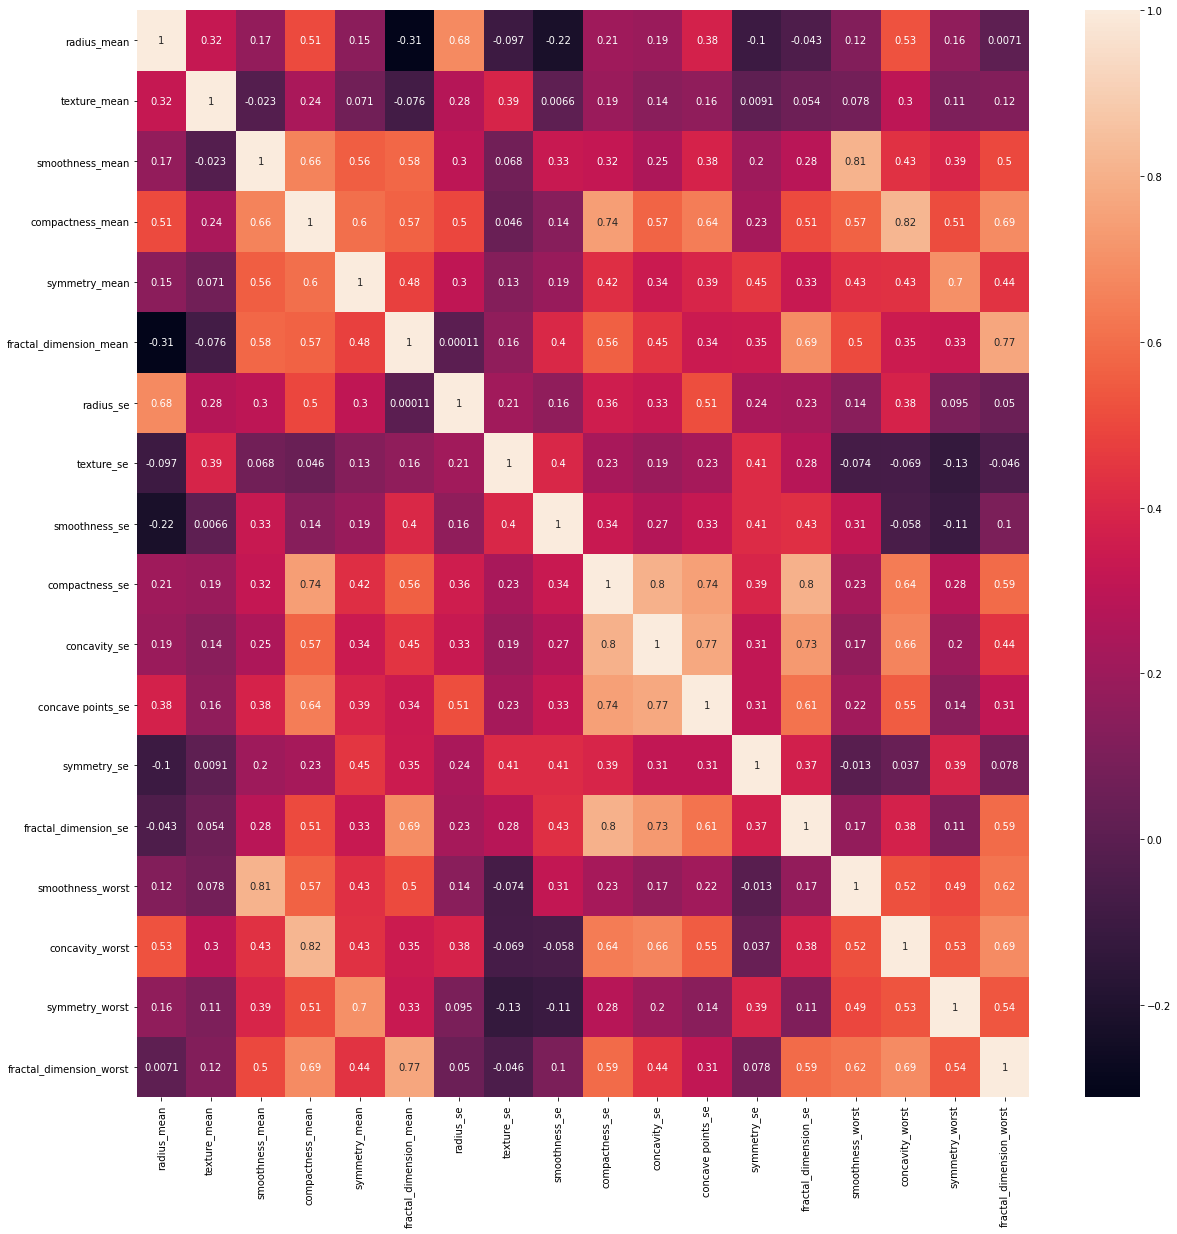

In [8]:
to_drop = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_mean', 'compactness_worst', 'concave points_worst']
dataset = dataset.drop(to_drop, axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

Creating the vector of the dependent variable and the matrix of the features

In [9]:
X = dataset.drop('diagnosis', axis=1)
y = dataset[['diagnosis']]

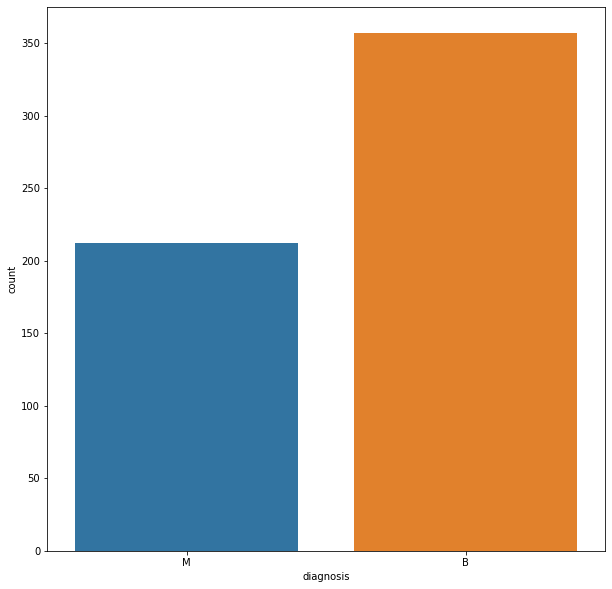

In [10]:
plt.figure(figsize=(10, 10))
sns.countplot(data=dataset, x='diagnosis')
plt.show()

The distribution of the dependent variable is slightly imbalanced.

# Feature selection

Due to the fact that the features are continuous numbers and the target variable is categorical, we'll apply the ANOVA test to check which features we should use.

In [11]:
from sklearn.feature_selection import f_classif
f_stat, _ = f_classif(X, np.ravel(y))
f_stat_values = sorted(list(zip(f_stat, X.columns)), key=lambda x: x[0], reverse=True)
f_stat_values

[(646.9810209786473, 'radius_mean'),
 (436.69193940305007, 'concavity_worst'),
 (313.23307856764205, 'compactness_mean'),
 (268.84032696734437, 'radius_se'),
 (122.47288045844209, 'smoothness_worst'),
 (118.8602321361969, 'symmetry_worst'),
 (118.09605934497365, 'texture_mean'),
 (113.26275994492413, 'concave points_se'),
 (83.65112340843194, 'smoothness_mean'),
 (69.52744350046207, 'symmetry_mean'),
 (66.44396064959517, 'fractal_dimension_worst'),
 (53.24733912812024, 'compactness_se'),
 (39.01448155684746, 'concavity_se'),
 (3.468274757042187, 'fractal_dimension_se'),
 (2.5579678031863895, 'smoothness_se'),
 (0.0934592948710943, 'fractal_dimension_mean'),
 (0.03909470231209489, 'texture_se'),
 (0.024117406685952966, 'symmetry_se')]

I'll use 10 most important features

In [12]:
features = np.array(f_stat_values)
features = features[:10, 1]
X = X[features].values

# Splitting the dataset to the train and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Data preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preprocess_data(X_train, X_test, y_train, y_test):
    le = LabelEncoder()
    sc = MinMaxScaler(feature_range=(0, 1))

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    y_train = le.fit_transform(np.ravel(y_train))
    y_test = le.transform(np.ravel(y_test))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

# Searching for the best estimator

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = [LogisticRegression(), KNeighborsClassifier(), SVC(), RandomForestClassifier()]

for clf in classifiers:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    print(f'Average accuracy: {scores.mean():.3}, standard deviation: {scores.std():.3}, classifier: {clf}')


Average accuracy: 0.932, standard deviation: 0.0288, classifier: LogisticRegression()
Average accuracy: 0.943, standard deviation: 0.041, classifier: KNeighborsClassifier()
Average accuracy: 0.965, standard deviation: 0.0282, classifier: SVC()
Average accuracy: 0.965, standard deviation: 0.0247, classifier: RandomForestClassifier()


# Hyperparameter tuning

SVC and RandomForest turned out to be the most accurate classifiers, I'll use grid search for hyperparameter tuning

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([('clf', SVC())])

parameters = [
    {'clf' : [SVC(),],
     'clf__C' : np.arange(0.1, 1.1, 0.1),
     'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'clf__degree' : [2, 3, 4]
     },
    {'clf' : [RandomForestClassifier()],
     'clf__n_estimators' : np.arange(50, 201, 25),
     'clf__criterion' : ['gini', 'entropy']
     }]

grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, cv=10, n_jobs= -1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Pipeline(steps=[('clf', SVC(C=0.6, kernel='poly'))])

# Accuracy and F1 score

Accuracy score: 0.982
F1 score: 0.976


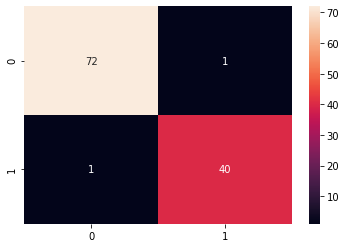

In [20]:
from sklearn.metrics import f1_score, confusion_matrix
clf = SVC(C=0.6, kernel='poly')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy score: {accuracy:.3}\nF1 score: {f1:.3}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

The estimator got only 1 false positive and 1 false negative.